In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns

from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline
plt.style.use('seaborn-white')

C:\Users\mille\Conda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
df = pd.read_csv('/Users/mille/Desktop/BeeColony/BeeLoss.csv')


In [3]:
df.head()


,Year,Season,State,Total_Annual_Loss,Total_Annual_Loss_percentage,Beekeepers,Beekeepers_Exclusive_to_State,Beekeepers_Exclusive_to_State_percentage,Colonies,Colonies_Exclusive_to_State,Colonies_Exclusive_to_State_percentage
0,2017,Annual,Massachusetts,0.159,15.9,87,0.943,94.3,27186,0.023,2.3
1,2017,Annual,Montana,0.171,17.1,21,0.524,52.4,35905,0.003,0.3
2,2017,Annual,Nevada,0.230,23.0,13,0.923,92.3,2512,0.052,5.2
3,2017,Annual,Maine,0.233,23.3,65,0.938,93.8,41102,0.014,1.4
4,2017,Annual,Wyoming,0.234,23.4,18,0.778,77.8,6521,0.014,1.4


In [29]:
df.describe()

,Year,Total_Annual_Loss,Total_Annual_Loss_percentage,Beekeepers,Beekeepers_Exclusive_to_State,Beekeepers_Exclusive_to_State_percentage,Colonies,Colonies_Exclusive_to_State,Colonies_Exclusive_to_State_percentage
count,365.000000,349.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,2013.989041,0.411450,39.341370,85.038356,0.854014,85.401370,37175.526027,0.400003,40.000274
std,2.002715,0.143868,16.402252,107.269526,0.205144,20.514442,86769.745718,0.390924,39.092437
min,2011.000000,0.075000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,2012.000000,0.314000,29.400000,21.000000,0.838000,83.800000,952.000000,0.032000,3.200000
50%,2014.000000,0.398000,39.000000,53.000000,0.929000,92.900000,4799.000000,0.207000,20.700000
75%,2016.000000,0.485000,48.200000,112.000000,0.969000,96.900000,33093.000000,0.828000,82.800000
max,2017.000000,0.869000,86.900000,828.000000,1.000000,100.000000,625897.000000,1.000000,100.000000


In [30]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from gensim import corpora, models

from collections import Counter



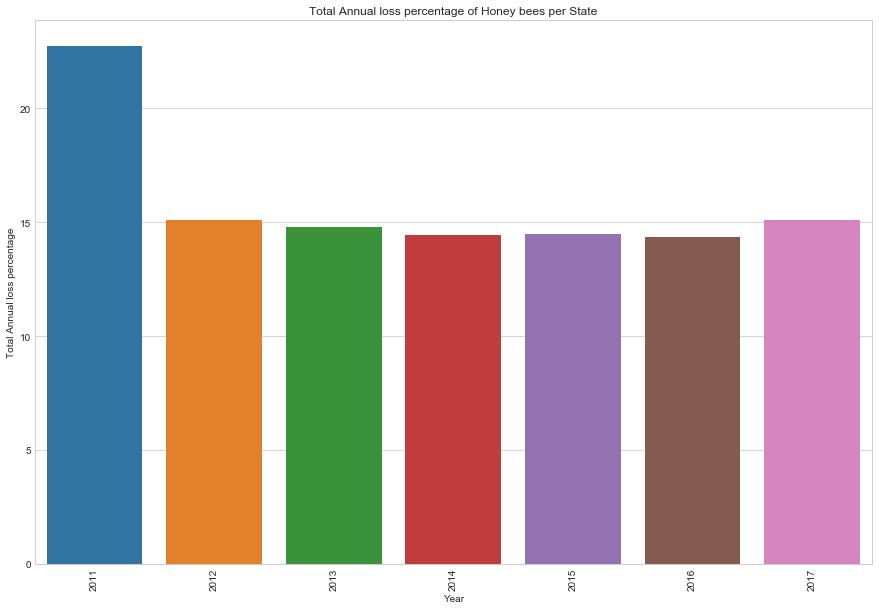

In [30]:
state_yield = df[['Year','Total_Annual_Loss_percentage']].groupby(['Year']).std()
state_yield = state_yield['Total_Annual_Loss_percentage'].sort_values(ascending=False)[:50]
state_yield_keys = state_yield.index
state_yield_val = state_yield.values
fig,ax = plt.subplots(figsize=(15,10))
sns.barplot(x = state_yield_keys,y =state_yield_val)
plt.title('Total Annual loss percentage of Honey bees per State')
plt.ylabel('Total Annual loss percentage')
ticks = plt.setp(ax.get_xticklabels(),rotation=90)



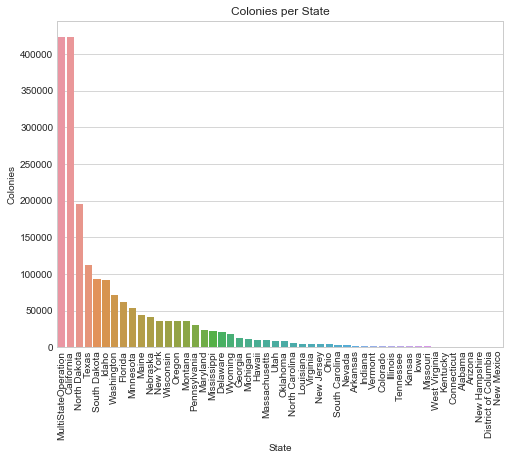

In [32]:
state_yield = df[['State','Colonies']].groupby(['State']).median()
state_yield = state_yield['Colonies'].sort_values(ascending=False)[:50]
state_yield_keys = state_yield.index
state_yield_val = state_yield.values
fig,ax = plt.subplots(figsize=(8,6))
sns.barplot(x = state_yield_keys,y =state_yield_val)
plt.title('Colonies per State')
plt.ylabel('Colonies')
ticks = plt.setp(ax.get_xticklabels(),rotation=90)

C:\Users\mille\Conda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


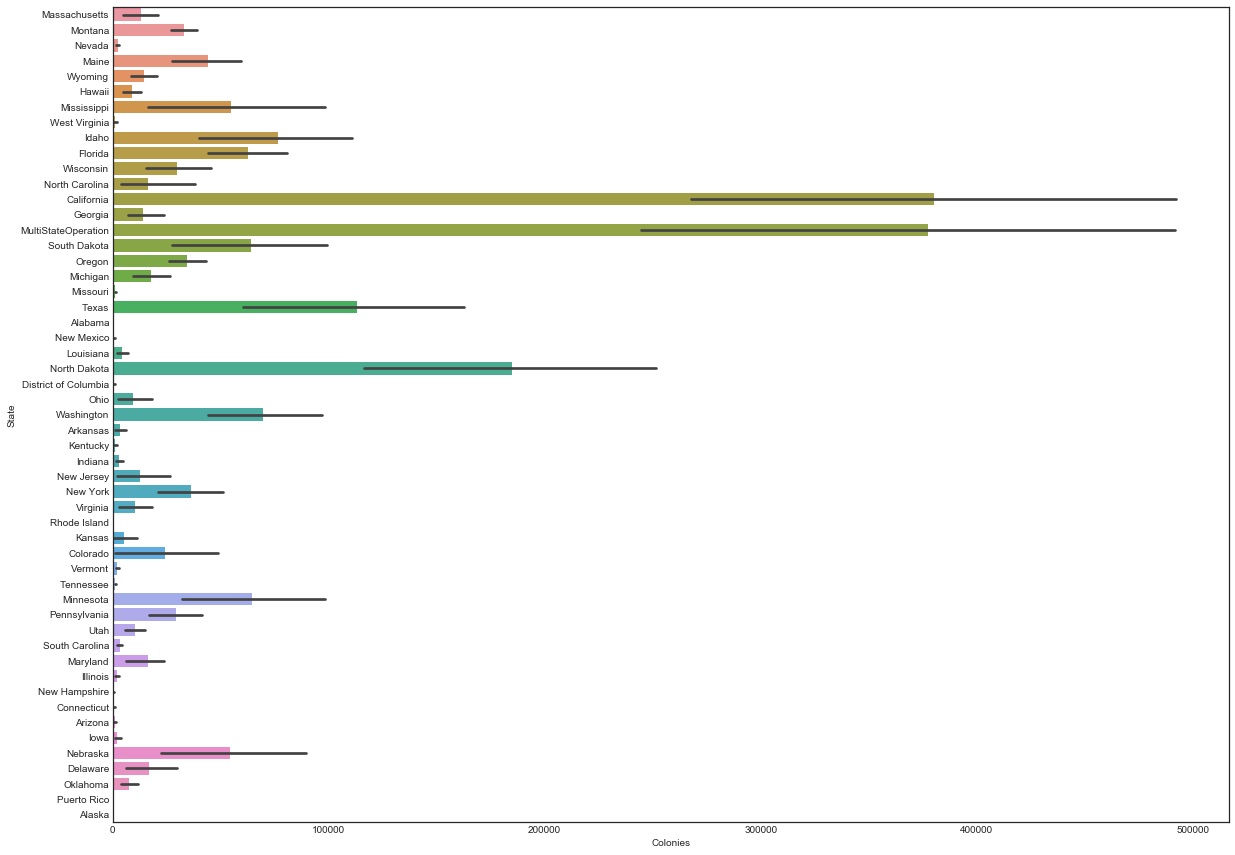

In [33]:
plt.subplots(figsize=(20,15))

sns.barplot(x='Colonies',y='State',data=df)

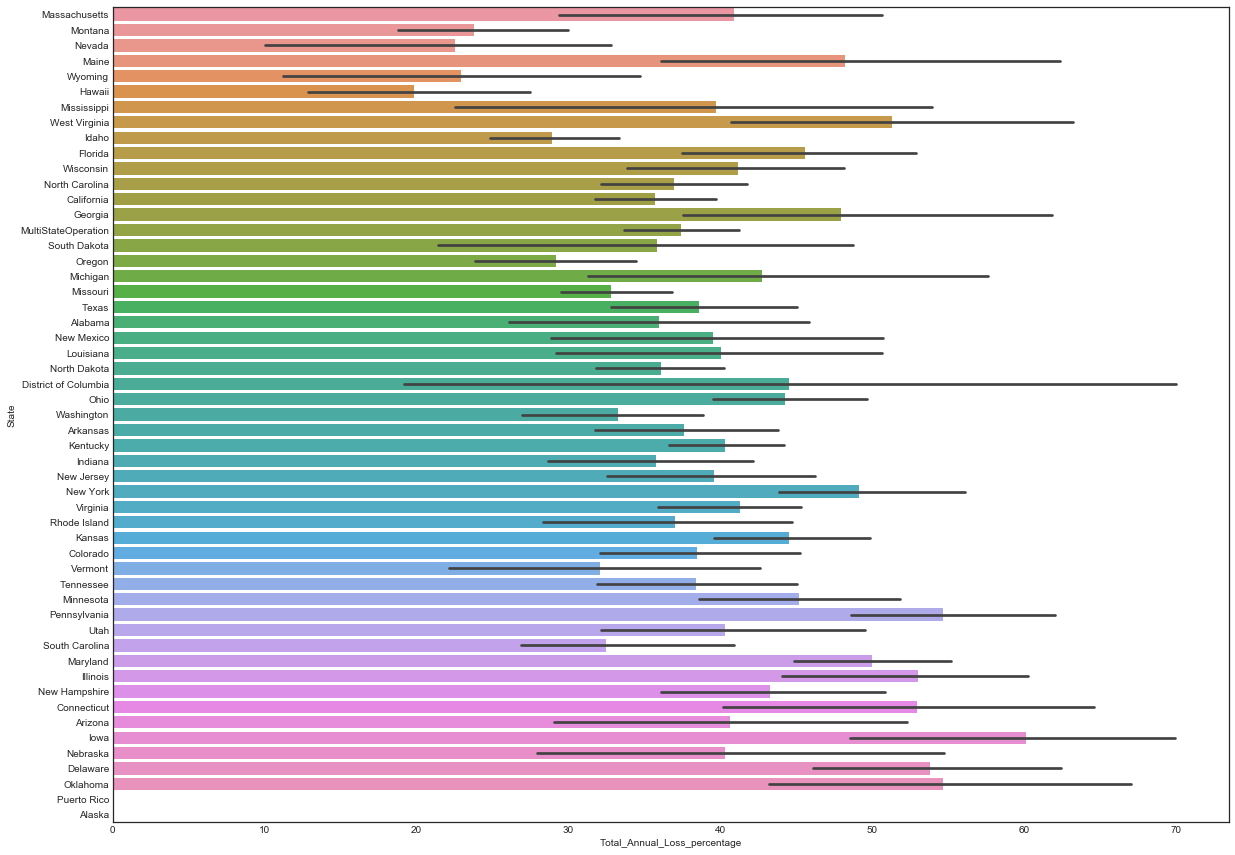

In [34]:
plt.subplots(figsize=(20,15))

sns.barplot(x='Total_Annual_Loss_percentage',y='State',data=df)

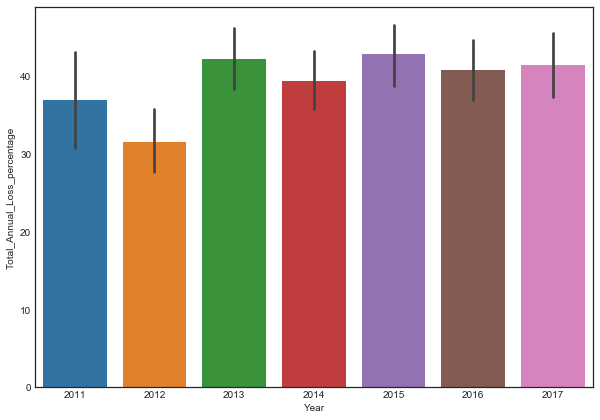

In [35]:
plt.subplots(figsize=(10,7))

sns.barplot(x='Year',y='Total_Annual_Loss_percentage',data=df)

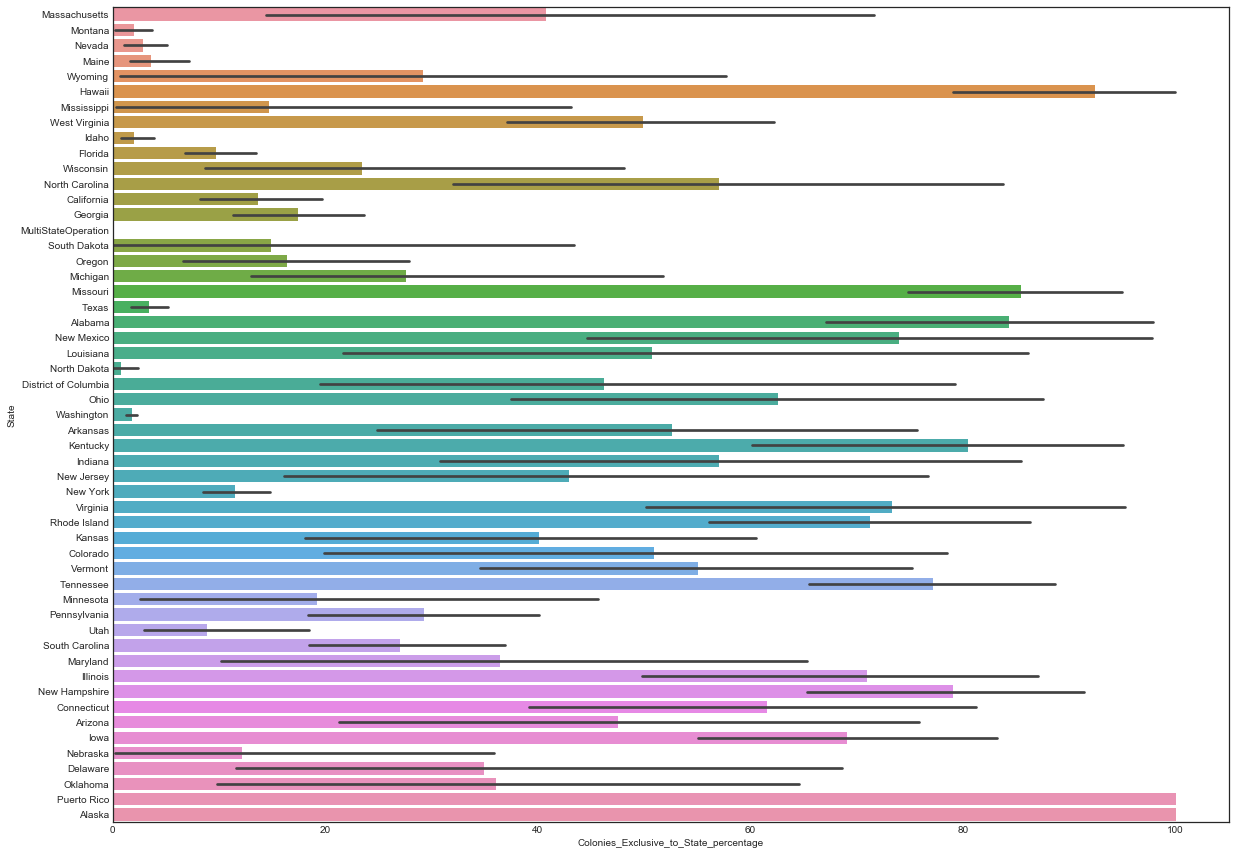

In [36]:
plt.subplots(figsize=(20,15))

sns.barplot(x='Colonies_Exclusive_to_State_percentage',y='State',data=df)

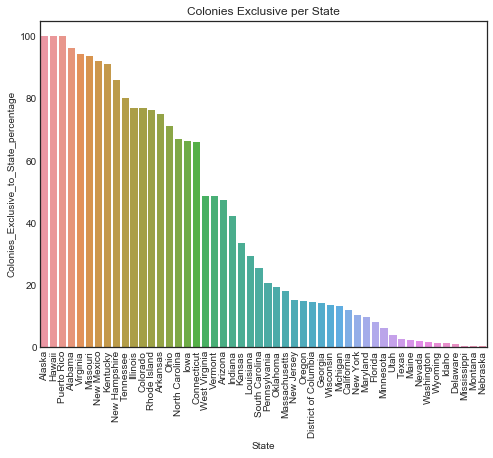

In [38]:
state_yield = df[['State','Colonies_Exclusive_to_State_percentage']].groupby(['State']).median()
state_yield = state_yield['Colonies_Exclusive_to_State_percentage'].sort_values(ascending=False)[:50]
state_yield_keys = state_yield.index
state_yield_val = state_yield.values
fig,ax = plt.subplots(figsize=(8,6))
sns.barplot(x = state_yield_keys,y =state_yield_val)
plt.title('Colonies Exclusive per State')
plt.ylabel('Colonies_Exclusive_to_State_percentage')
ticks = plt.setp(ax.get_xticklabels(),rotation=90)

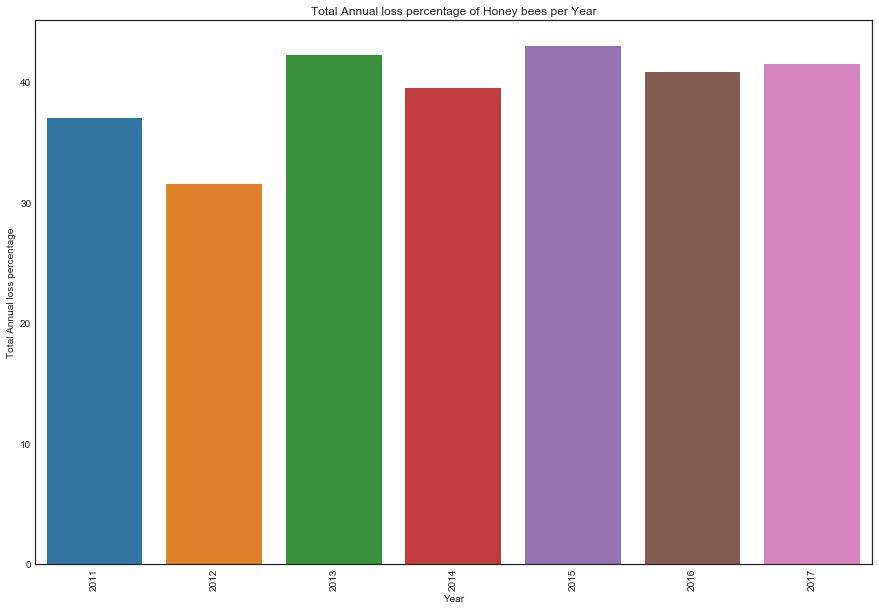

In [39]:
state_yield = df[['Year','Total_Annual_Loss_percentage']].groupby(['Year']).mean()
state_yield = state_yield['Total_Annual_Loss_percentage'].sort_values(ascending=False)[:50]
state_yield_keys = state_yield.index
state_yield_val = state_yield.values
fig,ax = plt.subplots(figsize=(15,10))
sns.barplot(x = state_yield_keys,y =state_yield_val)
plt.title('Total Annual loss percentage of Honey bees per Year')
plt.ylabel('Total Annual loss percentage')
ticks = plt.setp(ax.get_xticklabels(),rotation=90)



(0, 1.0)

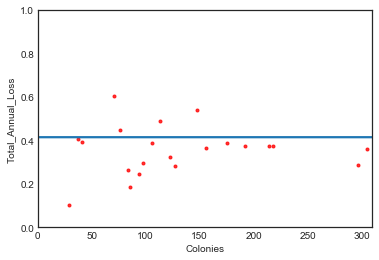

In [40]:
sns.regplot(df.Colonies, df.Total_Annual_Loss, order=1, ci=None, scatter_kws={'color':'r', 's':9})
plt.xlim(0,310)
plt.ylim(0,1.0)

In [35]:
grouped = df.groupby('State')

for name,group in grouped:
    print(name)
    print(group)
    

Alabama
     Year  Season    State  Total_Annual_Loss  Total_Annual_Loss_percentage  \
20   2017  Annual  Alabama              0.349                          34.9   
58   2016  Annual  Alabama              0.284                          28.4   
135  2015  Annual  Alabama              0.480                          48.0   
192  2014  Annual  Alabama              0.443                          44.3   
248  2013  Annual  Alabama              0.551                          55.1   
277  2012  Annual  Alabama              0.270                          27.0   
314  2011  Annual  Alabama              0.139                          13.9   

     Beekeepers  Beekeepers_Exclusive_to_State  \
20           38                          0.974   
58           43                          0.977   
135          28                          0.964   
192          33                          0.939   
248          36                          0.944   
277          25                          0.960   
314      

     Year  Season    State  Total_Annual_Loss  Total_Annual_Loss_percentage  \
29   2017  Annual  Indiana              0.414                          41.4   
70   2016  Annual  Indiana              0.395                          39.5   
138  2015  Annual  Indiana              0.485                          48.5   
183  2014  Annual  Indiana              0.409                          40.9   
211  2013  Annual  Indiana              0.271                          27.1   
263  2012  Annual  Indiana              0.194                          19.4   
331  2011  Annual  Indiana              0.338                          33.8   

     Beekeepers  Beekeepers_Exclusive_to_State  \
29           99                          1.000   
70          152                          0.987   
138          92                          0.967   
183         174                          0.960   
211         108                          0.963   
263          60                          0.950   
331          65  

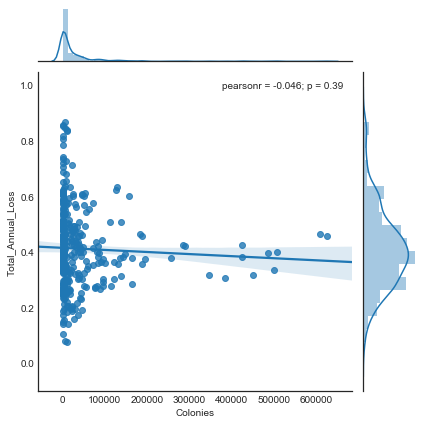

In [41]:
sns.jointplot(x='Colonies',y='Total_Annual_Loss',data=df,kind='reg')

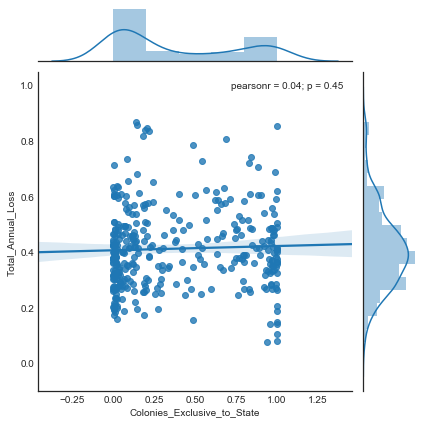

In [42]:
sns.jointplot(x='Colonies_Exclusive_to_State',y='Total_Annual_Loss',data=df,kind='reg')

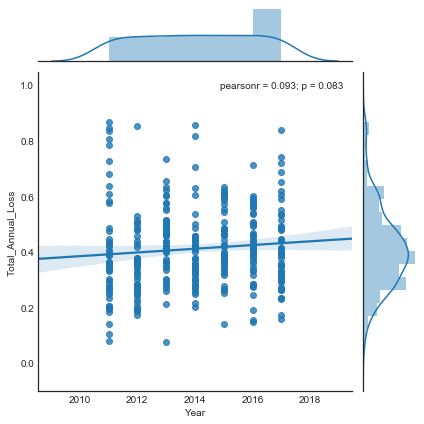

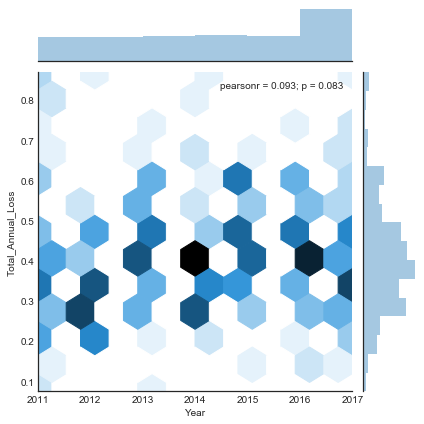

In [43]:
sns.jointplot(x='Year',y='Total_Annual_Loss',data=df,kind='reg')
sns.jointplot("Year", "Total_Annual_Loss", data=df, kind="hex")

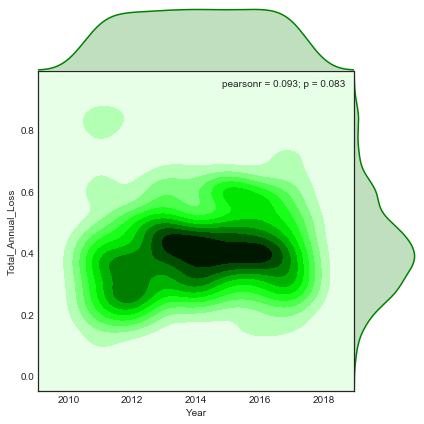

In [44]:
sns.jointplot("Year", "Total_Annual_Loss", data=df,
              kind="kde", space=0, color="g")



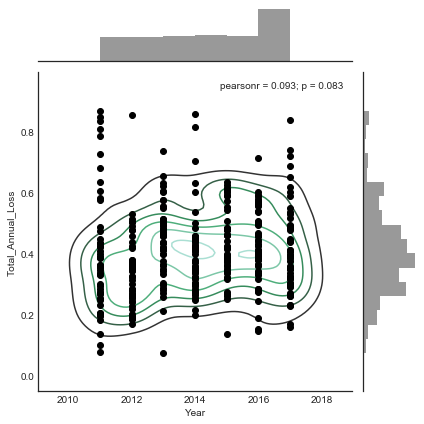

In [45]:
(sns.jointplot("Year", "Total_Annual_Loss", data=df, color="k").plot_joint(sns.kdeplot, zorder=0, n_levels=6))

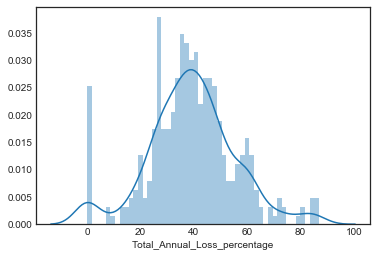

In [47]:
sns.distplot((df.Total_Annual_Loss_percentage),bins=50)

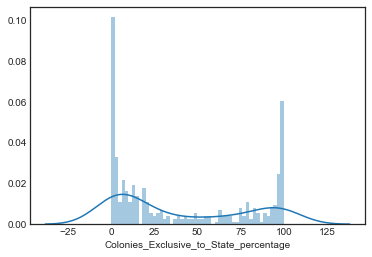

In [48]:
sns.distplot((df.Colonies_Exclusive_to_State_percentage),bins=50)

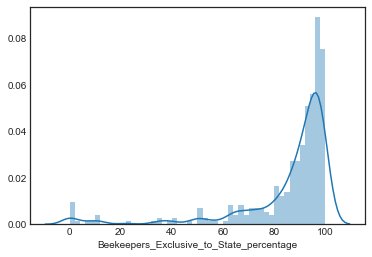

In [49]:
sns.distplot((df.Beekeepers_Exclusive_to_State_percentage),bins=50)

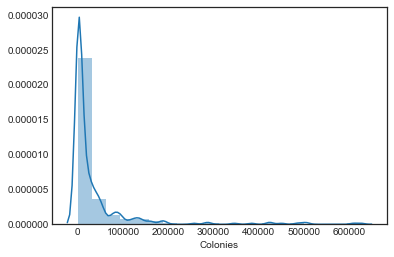

In [50]:
sns.distplot((df.Colonies),bins=20)

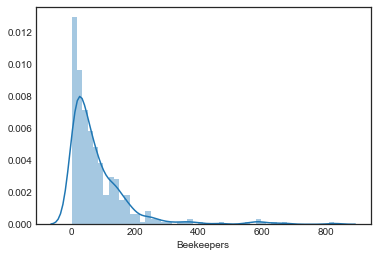

In [51]:
sns.distplot((df.Beekeepers),bins=50)

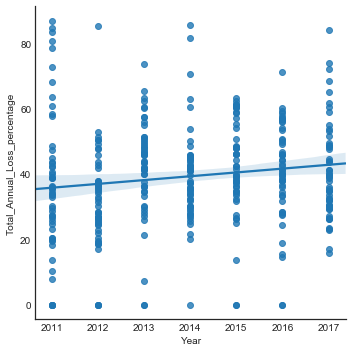

In [52]:
sns.lmplot(x='Year',y='Total_Annual_Loss_percentage',data=df)

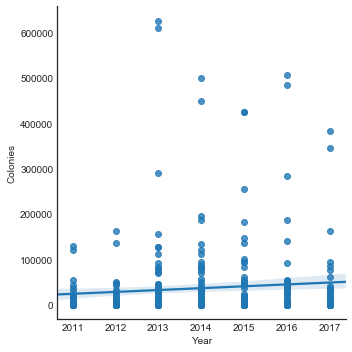

In [53]:
sns.lmplot(x='Year',y='Colonies',data=df)

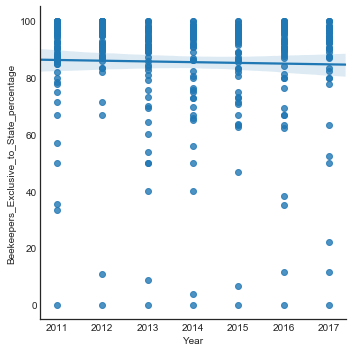

In [54]:
sns.lmplot(x='Year',y='Beekeepers_Exclusive_to_State_percentage',data=df)

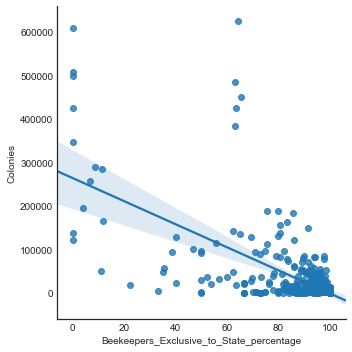

In [55]:
sns.lmplot(x='Beekeepers_Exclusive_to_State_percentage',y='Colonies',data=df)

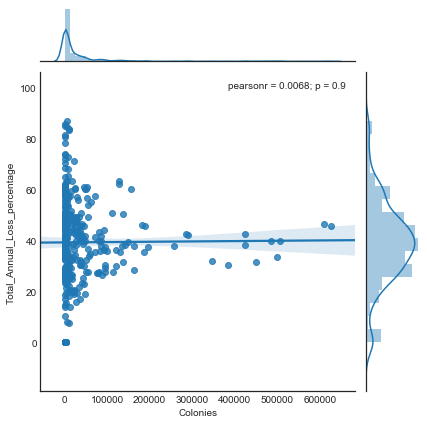

In [56]:
sns.jointplot(x='Colonies',y='Total_Annual_Loss_percentage',data=df,kind='reg')


In [57]:
est = smf.ols('Beekeepers_Exclusive_to_State_percentage ~ Colonies', df).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,90.9129,0.911,99.750,0.000,89.121,92.705
Colonies,-0.0001,9.67e-06,-15.338,0.000,-0.000,-0.000


In [79]:
decline.corr()

NameError: name 'decline' is not defined

In [59]:
est = smf.ols('Colonies_Exclusive_to_State_percentage ~ Total_Annual_Loss_percentage', df).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,47.9508,5.312,9.027,0.000,37.505,58.396
Total_Annual_Loss_percentage,-0.2021,0.125,-1.621,0.106,-0.447,0.043


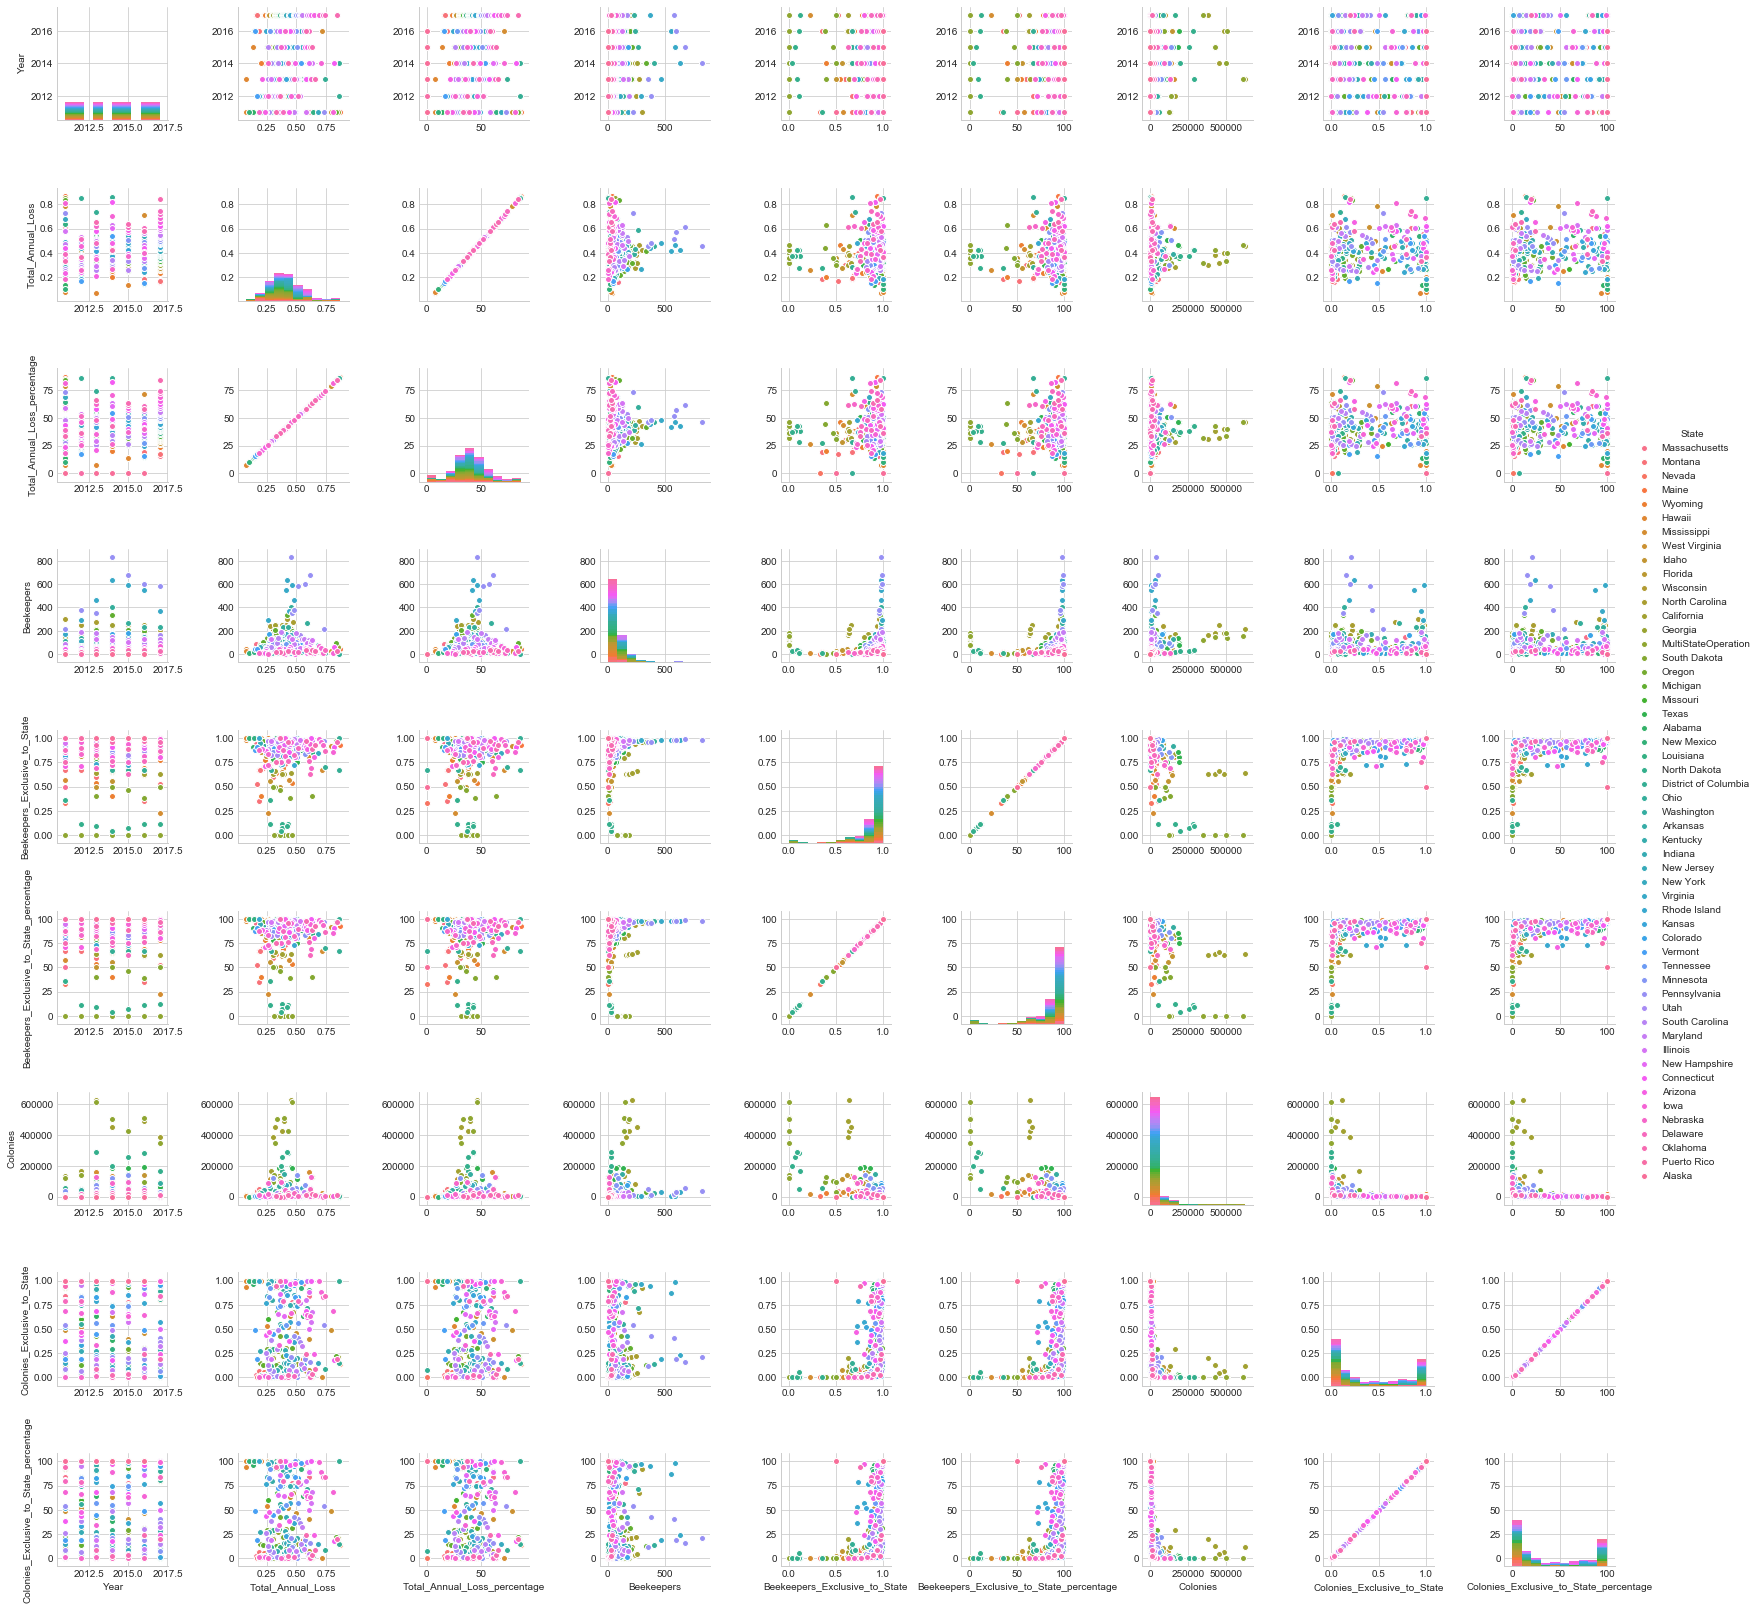

In [17]:
sns.pairplot(df, hue="State", palette="husl")

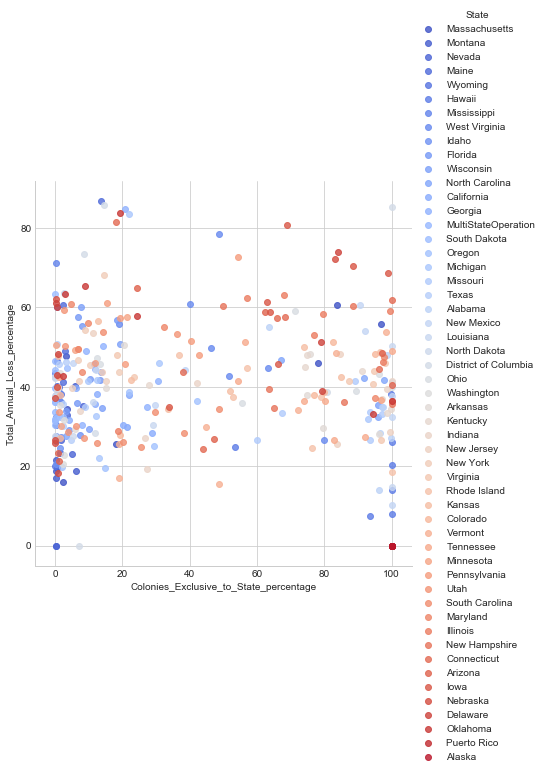

In [6]:
sns.set_style('whitegrid')
sns.lmplot('Colonies_Exclusive_to_State_percentage','Total_Annual_Loss_percentage',data=df, hue='State',
           palette='coolwarm',size=6,aspect=1,fit_reg=False)

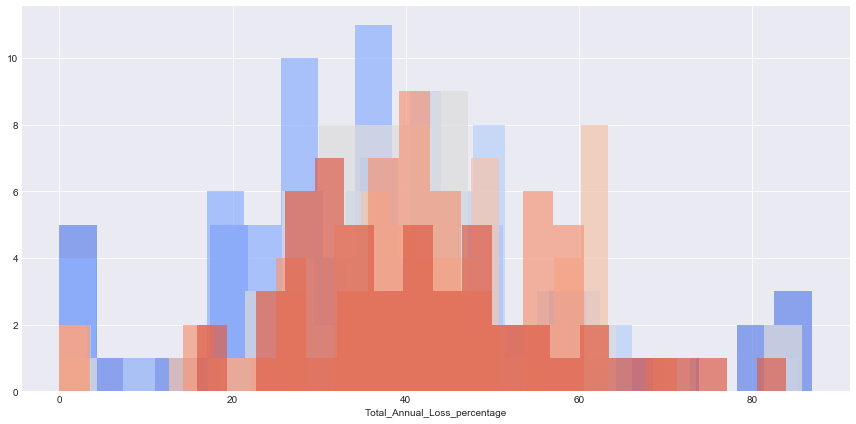

In [61]:
sns.set_style('darkgrid')
g = sns.FacetGrid(df,hue="Year",palette='coolwarm',size=6,aspect=2)
g = g.map(plt.hist,'Total_Annual_Loss_percentage',bins=20,alpha=0.7)

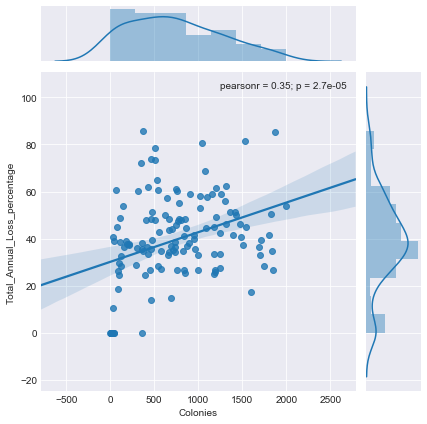

In [74]:
#talp = df[df['Total_Annual_Loss_percentage'] > 65]
#talp

loss = df[df['Colonies'] < 2000]
loss

#sns.set_style('whitegrid')
#sns.lmplot('Total_Annual_Loss_percentage','Colonies',talp, hue='State',
           #palette='coolwarm',size=6,aspect=1,fit_reg=False)

#sns.lmplot(x='Colonies',y='Total_Annual_Loss_percentage',data=loss)

sns.jointplot(x='Colonies',y='Total_Annual_Loss_percentage',data=loss,kind='reg')
#sns.jointplot(x='Colonies',y='Total_Annual_Loss_percentage',data=df,kind='reg')


#sns.distplot((talp.Total_Annual_Loss_percentage),bins=20)

#sns.jointplot(x='Total_Annual_Loss_percentage',y='Colonies',data=talp,color='blue',kind='kde');

#talp.corr()




In [83]:
loss.corr()


,Year,Total_Annual_Loss,Total_Annual_Loss_percentage,Beekeepers,Beekeepers_Exclusive_to_State,Beekeepers_Exclusive_to_State_percentage,Colonies,Colonies_Exclusive_to_State,Colonies_Exclusive_to_State_percentage
Year,1.000000,0.193686,0.192245,0.144638,0.049440,0.049440,0.070981,0.011125,0.011125
Total_Annual_Loss,0.193686,1.000000,1.000000,0.027076,-0.076744,-0.076744,0.121008,-0.106450,-0.106450
Total_Annual_Loss_percentage,0.192245,1.000000,1.000000,0.241098,-0.063865,-0.063865,0.351609,-0.196920,-0.196920
Beekeepers,0.144638,0.027076,0.241098,1.000000,0.340370,0.340370,0.617394,0.182992,0.182992
Beekeepers_Exclusive_to_State,0.049440,-0.076744,-0.063865,0.340370,1.000000,1.000000,0.172481,0.599129,0.599129
Beekeepers_Exclusive_to_State_percentage,0.049440,-0.076744,-0.063865,0.340370,1.000000,1.000000,0.172481,0.599129,0.599129
Colonies,0.070981,0.121008,0.351609,0.617394,0.172481,0.172481,1.000000,-0.191167,-0.191167
Colonies_Exclusive_to_State,0.011125,-0.106450,-0.196920,0.182992,0.599129,0.599129,-0.191167,1.000000,1.000000
Colonies_Exclusive_to_State_percentage,0.011125,-0.106450,-0.196920,0.182992,0.599129,0.599129,-0.191167,1.000000,1.000000


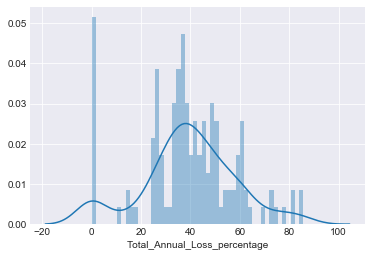

In [64]:
sns.distplot((loss.Total_Annual_Loss_percentage),bins=50)


In [8]:
df[df['Total_Annual_Loss_percentage'] < 15]

,Year,Season,State,Total_Annual_Loss,Total_Annual_Loss_percentage,Beekeepers,Beekeepers_Exclusive_to_State,Beekeepers_Exclusive_to_State_percentage,Colonies,Colonies_Exclusive_to_State,Colonies_Exclusive_to_State_percentage
51,2016,Annual,Louisiana,0.147,14.7,21,1.000,100.0,695,1.000,100.0
102,2016,Annual,Puerto Rico,NaN,0.0,1,1.000,100.0,1,1.000,100.0
103,2016,Annual,Alaska,NaN,0.0,2,1.000,100.0,7,1.000,100.0
104,2015,Annual,Hawaii,0.139,13.9,28,1.000,100.0,12093,1.000,100.0
154,2015,Annual,District of Columbia,NaN,0.0,3,0.667,66.7,360,0.073,7.3
155,2015,Annual,Alaska,NaN,0.0,2,1.000,100.0,11,1.000,100.0
207,2014,Annual,Alaska,NaN,0.0,3,1.000,100.0,15,1.000,100.0
208,2013,Annual,Hawaii,0.075,7.5,41,0.976,97.6,10027,0.937,93.7
258,2013,Annual,Nevada,NaN,0.0,4,0.500,50.0,2556,0.003,0.3
259,2013,Annual,Alaska,NaN,0.0,2,1.000,100.0,13,1.000,100.0


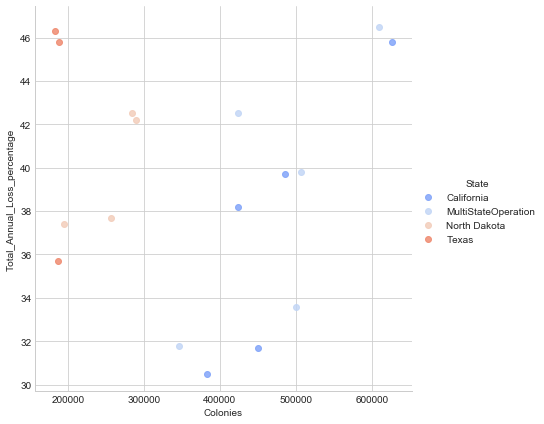

In [34]:
loss = df[df['Colonies'] > 170000]
loss

sns.set_style('whitegrid')
sns.lmplot('Colonies','Total_Annual_Loss_percentage',loss, hue='State',
           palette='coolwarm',size=6,aspect=1,fit_reg=False)

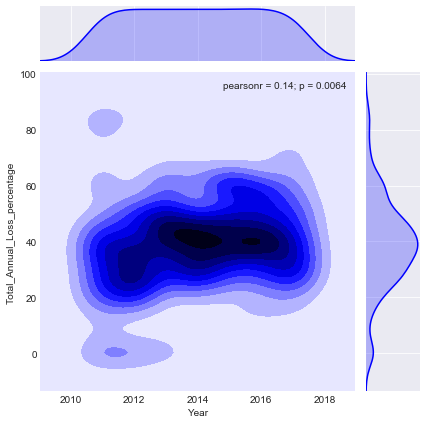

In [118]:
sns.jointplot(x='Year',y='Total_Annual_Loss_percentage',data=df,color='blue',kind='kde');

In [126]:
state_mean = df.groupby('State').mean()
state_mean

,Year,Total_Annual_Loss,Total_Annual_Loss_percentage,Beekeepers,Beekeepers_Exclusive_to_State,Beekeepers_Exclusive_to_State_percentage,Colonies,Colonies_Exclusive_to_State,Colonies_Exclusive_to_State_percentage
State,,,,,,,,,
Alabama,2014.0,0.359429,35.942857,32.000000,0.951857,95.185714,645.142857,0.843571,84.357143
Alaska,2013.8,NaN,0.000000,2.200000,0.900000,90.000000,10.400000,1.000000,100.000000
Arizona,2014.0,0.406143,40.614286,7.571429,0.829429,82.942857,988.142857,0.475714,47.571429
Arkansas,2014.0,0.376429,37.642857,41.857143,0.926000,92.600000,3188.285714,0.526143,52.614286
California,2014.0,0.357143,35.714286,187.428571,0.689857,68.985714,380262.285714,0.136286,13.628571
Colorado,2014.0,0.384429,38.442857,124.142857,0.975143,97.514286,24208.714286,0.508857,50.885714
Connecticut,2014.0,0.529714,52.971429,50.142857,0.918857,91.885714,804.285714,0.615286,61.528571
Delaware,2014.0,0.538000,53.800000,20.857143,0.801857,80.185714,17020.857143,0.349571,34.957143
District of Columbia,2014.0,0.623200,44.514286,7.285714,0.800143,80.014286,480.000000,0.462000,46.200000


In [127]:
state_mean.corr()

,Year,Total_Annual_Loss,Total_Annual_Loss_percentage,Beekeepers,Beekeepers_Exclusive_to_State,Beekeepers_Exclusive_to_State_percentage,Colonies,Colonies_Exclusive_to_State,Colonies_Exclusive_to_State_percentage
Year,1.000000,NaN,0.555763,0.138818,-0.112157,-0.112157,0.079278,-0.330903,-0.330903
Total_Annual_Loss,NaN,1.000000,0.931570,0.134178,0.179852,0.179852,-0.157812,0.060247,0.060247
Total_Annual_Loss_percentage,0.555763,0.931570,1.000000,0.273972,0.120158,0.120158,-0.030940,-0.195472,-0.195472
Beekeepers,0.138818,0.134178,0.273972,1.000000,0.188259,0.188259,0.131721,-0.029818,-0.029818
Beekeepers_Exclusive_to_State,-0.112157,0.179852,0.120158,0.188259,1.000000,1.000000,-0.726786,0.524283,0.524283
Beekeepers_Exclusive_to_State_percentage,-0.112157,0.179852,0.120158,0.188259,1.000000,1.000000,-0.726786,0.524283,0.524283
Colonies,0.079278,-0.157812,-0.030940,0.131721,-0.726786,-0.726786,1.000000,-0.482330,-0.482330
Colonies_Exclusive_to_State,-0.330903,0.060247,-0.195472,-0.029818,0.524283,0.524283,-0.482330,1.000000,1.000000
Colonies_Exclusive_to_State_percentage,-0.330903,0.060247,-0.195472,-0.029818,0.524283,0.524283,-0.482330,1.000000,1.000000


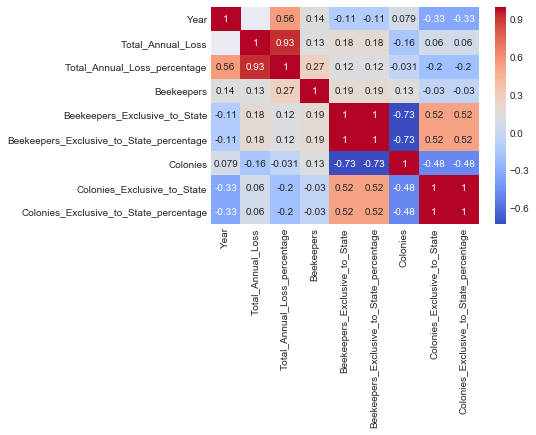

In [128]:
sns.heatmap(state_mean.corr(),cmap='coolwarm',annot=True)